# 당뇨병 딥러닝 분류

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
X = df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 원 핫 인코딩
독립적인 데이터들 ex) 색 : 빨강, 파랑, 노랑 // 동물 : 강아지, 새, 고양이 처럼 순서가 X 
종류가 많아질수록 데이터가 방대해진다는 단점

In [13]:
Y = pd.get_dummies(y).values

# 이건 딥러닝을 위한 Numpy 변환

In [15]:
X = X.values


모델 생성

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [18]:

X_train.shape ,X_test.shape, y_train.shape,y_test.shape # data 확인하기(잘 들어갔는지)

((614, 8), (154, 8), (614, 2), (154, 2))

# 손실함수 
# Binary Crossentropy
    이 손실 함수는 이진 분류 문제(binary classification)에 사용됨
    여기서 모델은 단 두 개의 클래스 중 하나를 예측해야 함
    보통 시그모이드 활성화 함수(sigmoid activation function)를 출력 계층에 사용
    이 함수는 0과 1 사이의 값을 반환하여 각 클래스에 속할 확률을 나타냄

# Categorical Crossentropy
    다중 클래스 분류 문제(multi-class classification)에 사용됨
    모델은 두 개 이상의 클래스 중 하나를 예측해야 함
    소프트맥스 활성화 함수(sofrmax activation function)가 일반적으로 사용됨
    이 함수는 모든 클래스에 대해 확률 분포를 반환하여 각 클래스에 속할 확률을 나타냄

In [20]:
#Defining the model 모델 생성!!!!!

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))  # 0/1 은 1과 sigmoid 로

model.compile(Adam(learning_rate=0.04),'bin_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\syk98\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246 (984.00 B)

 Trainable params: 246 (984.00 B)

 Non-trainable params: 0 (0.00 B)

모델 학습

In [22]:
from sklearn.metrics import accuracy_score

model_history = model.fit(X_train, y_train, epochs=30, batch_size=42, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.5142 - loss: 12.0730 - val_accuracy: 0.6948 - val_loss: 0.6462
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6547 - loss: 0.6504 - val_accuracy: 0.6948 - val_loss: 0.6156
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6553 - loss: 0.6448 - val_accuracy: 0.6948 - val_loss: 0.6202
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6314 - loss: 0.6592 - val_accuracy: 0.6948 - val_loss: 0.6283
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6596 - loss: 0.6443 - val_accuracy: 0.6948 - val_loss: 0.6183
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6030 - loss: 0.6780 - val_accuracy: 0.6948 - val_loss: 0.6282
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6254 - loss: 0.6608 - val_accuracy: 0.6948 - val_loss: 0.6175
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6734 - loss: 0.6326 - val_accuracy: 0.6948 - val_los

손실데이터

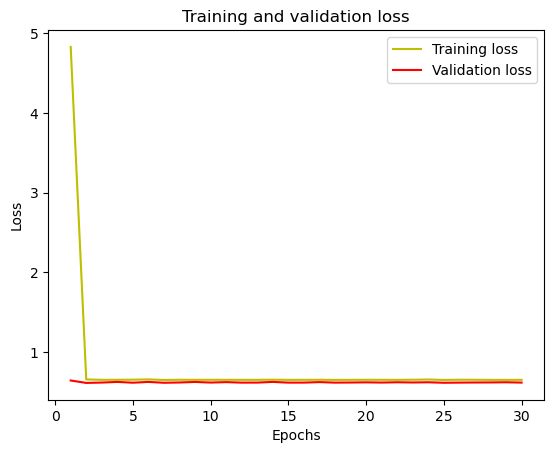

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

정확도 데이터

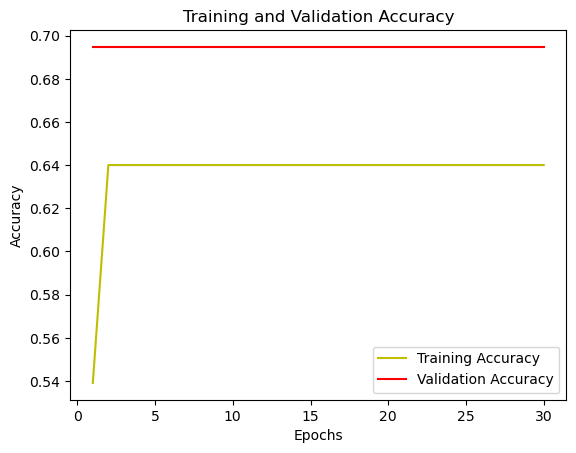

In [39]:
import matplotlib.pyplot as plt

# 모델 학습 기록에서 정확도 및 검증 정확도 추출
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

# 에포크 수에 따른 x축 값 설정
epochs = range(1, len(acc) + 1)

# 그래프 그리기
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
